In [1]:
import os
import random

import pandas as pd
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from utils.filemanagement import load_from_file
from utils.filemanagement import get_project_root
from utils.config import random_sample,seed

In [2]:
model_type="bertopic"
model_name="BERTopic"
experiment="embedding"
embedding_model = "TDE-nb-sbert-base"
data_type="np_mini_stopwords"
file_name_data = f"{data_type}.csv"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_data =f"preprocessed_data"
df = load_from_file(folder_path_data,file_name_data)
TOPN = 20
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"


folder_name = f"Embedding-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)



In [3]:
data = df.text.values.tolist()
timestamps = df.date.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
from flair.embeddings import TransformerDocumentEmbeddings

emb_model = TransformerDocumentEmbeddings('NbAiLab/nb-sbert-base')

In [5]:
topic_model = BERTopic(embedding_model=emb_model,verbose=True)
try:
    topic_model = BERTopic.load(file_path)
except:
    print("correctly")
    topics,probs = topic_model.fit_transform(documents=new_data)

In [6]:
topic_model.get_topic_info()

,Topic,Count,Name
0,0,3174,0_statsråden_regjeringen_representanten_gjelder
1,1,426,1_norge_fremskrittspartiet_regjeringen_sv


In [7]:
topics = topic_model.get_topics()

In [8]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys())-1

In [9]:
if NUM_TOPICS > 2:
    topic_model.visualize_topics()

In [10]:
topic_model.save(file_path,save_embedding_model=False)

In [11]:
topics

{0: [('statsråden', 0.03723611841231985),
  ('regjeringen', 0.028782452892880707),
  ('representanten', 0.028577044033599345),
  ('gjelder', 0.025496723375597784),
  ('fremskrittspartiet', 0.025427724652497152),
  ('norge', 0.023491818438112082),
  ('stortinget', 0.02151124121137977),
  ('ønsker', 0.019536350238811357),
  ('tror', 0.0193883036306868),
  ('spørsmål', 0.01856373867355352)],
 1: [('norge', 0.026948168073228498),
  ('fremskrittspartiet', 0.022314559572967026),
  ('regjeringen', 0.022078205557716918),
  ('sv', 0.01789824216624998),
  ('land', 0.017881687901339486),
  ('stortinget', 0.017191151896301656),
  ('gjelder', 0.016949451665422686),
  ('kr', 0.01653650042992847),
  ('barn', 0.016505520488504993),
  ('pst', 0.01480860949048286)]}

In [12]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys())-1

In [13]:
formatted_topics = [dict(topics[i]) for i in range(NUM_TOPICS)]

In [14]:
print(formatted_topics)

[{'statsråden': 0.03723611841231985, 'regjeringen': 0.028782452892880707, 'representanten': 0.028577044033599345, 'gjelder': 0.025496723375597784, 'fremskrittspartiet': 0.025427724652497152, 'norge': 0.023491818438112082, 'stortinget': 0.02151124121137977, 'ønsker': 0.019536350238811357, 'tror': 0.0193883036306868, 'spørsmål': 0.01856373867355352}]


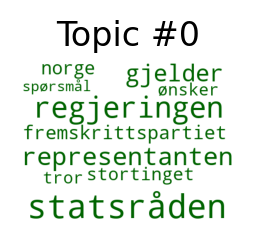

In [15]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(formatted_topics, f"{model_name}-{embedding_model}: {data_type}", NUM_TOPICS, dpi=200)

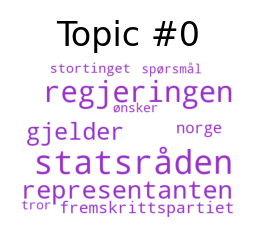

In [16]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [17]:
from utils.tables_and_plots import create_wordcloud



wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(topics[i]))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [18]:
from utils.filemanagement import write_topics_file
topic_words_numbered = []
for i, key in enumerate(topics.keys()):
    if key == -1:
        continue
    r = topics[key]
    rr = []
    for item in r:
        rr.append(item[0])
    topic_words_numbered.append((i,rr))



write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [19]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)


In [20]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [21]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [22]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [23]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('regjeringen', 'statsråden') wordtuple
('regjeringen', 'statsråden') wordup
1095.0 over
4574096.0 under
-12.028340059831075 -10.096715154488537 1.191312211524936 ('regjeringen', 'statsråden') 1095 2104 2174
('representanten', 'statsråden') wordtuple
('representanten', 'statsråden') wordup
532.0 over
3414792.0 under
-12.648083838339083 -9.05528243550119 1.3967630417304635 ('representanten', 'statsråden') 532 2104 1623
('gjelder', 'statsråden') wordtuple
('gjelder', 'statsråden') wordup
1119.0 over
3709352.0 under
-11.694741427636089 -10.127994320976393 1.1546947062771113 ('gjelder', 'statsråden') 1119 2104 1763
('fremskrittspartiet', 'statsråden') wordtuple
('fremskrittspartiet', 'statsråden') wordup
941.0 over
4130152.0 under
-12.099712534029937 -9.878050912728536 1.2249089057071614 ('fremskrittspartiet', 'statsråden') 941 2104 1963
('norge', 'statsråden') wordtuple
('norge', 'statsråden') wordup
880.0 over
4243768.0 under
-12.235554644380604 -9.78135971352466 1.2509052936129663 ('

In [24]:
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.013791991658821222


In [25]:
print(diversity)

0.75


In [26]:
print(coherence)

1.120172019204451


In [27]:
from tabulate import tabulate
import csv

In [28]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒══════════════════════════════════════════════╤═══════════╤═════════╕
│ Model                                        │ Metric    │   Value │
╞══════════════════════════════════════════════╪═══════════╪═════════╡
│ bertopic_TDE-nb-sbert-base_np_mini_stopwords │ coherence │ 1.12017 │
├──────────────────────────────────────────────┼───────────┼─────────┤
│ bertopic_TDE-nb-sbert-base_np_mini_stopwords │ diversity │ 0.75    │
╘══════════════════════════════════════════════╧═══════════╧═════════╛


In [29]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})